In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout,BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam 
import pandas as pd
import cv2 as cv2
import numpy as np 
from matplotlib import pyplot as plt 
import os 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
dataset = r"/content/drive/MyDrive/Colab Notebooks/BREAST CANCER DETECTION"
Yes_path = r"/content/drive/MyDrive/Colab Notebooks/BREAST CANCER DETECTION/BREAST CANCER DETECTION DATASET/1"
No_path = r"/content/drive/MyDrive/Colab Notebooks/BREAST CANCER DETECTION/BREAST CANCER DETECTION DATASET/0"

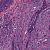

(50, 50, 3)


In [ ]:
img = cv2.imread(Yes_path+'/8863_idx5_x1001_y1501_class1.png')
cv2_imshow(img)
print(img.shape)

In [ ]:
vals = [Yes_path, No_path]
print(os.listdir(vals[0]).__len__())
print(os.listdir(vals[1]).__len__())

98
98


In [ ]:
pathdir = [Yes_path, No_path]
classes = ['Yes', 'No']
filepaths = []
labels = []
for i, j in zip(pathdir, classes):
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())


['8863_idx5_x1101_y1551_class1.png', '8863_idx5_x1101_y1151_class1.png', '8863_idx5_x1101_y1601_class1.png', '8863_idx5_x1151_y901_class1.png', '8863_idx5_x1051_y1101_class1.png', '8863_idx5_x1051_y801_class1.png', '8863_idx5_x1151_y951_class1.png', '8863_idx5_x1151_y1501_class1.png', '8863_idx5_x1151_y851_class1.png', '8863_idx5_x1101_y1101_class1.png', '8863_idx5_x1051_y1151_class1.png', '8863_idx5_x1051_y1651_class1.png', '8863_idx5_x1051_y1501_class1.png', '8863_idx5_x1101_y1451_class1.png', '8863_idx5_x1151_y751_class1.png', '8863_idx5_x1151_y1051_class1.png', '8863_idx5_x1151_y1151_class1.png', '8863_idx5_x1151_y1451_class1.png', '8863_idx5_x1001_y801_class1.png', '8863_idx5_x1001_y1551_class1.png', '8863_idx5_x1201_y851_class1.png', '8863_idx5_x1201_y751_class1.png', '8863_idx5_x1101_y1001_class1.png', '8863_idx5_x1101_y901_class1.png', '8863_idx5_x1051_y1051_class1.png', '8863_idx5_x1101_y951_class1.png', '8863_idx5_x1001_y1501_class1.png', '8863_idx5_x1051_y1001_class1.png', '

In [ ]:
print(filepaths[0:4])
print(labels[0:4])

print(filepaths[-4:])
print(labels[-4:])

['/content/drive/MyDrive/Colab Notebooks/BREAST CANCER DETECTION/BREAST CANCER DETECTION DATASET/1/8863_idx5_x1101_y1551_class1.png', '/content/drive/MyDrive/Colab Notebooks/BREAST CANCER DETECTION/BREAST CANCER DETECTION DATASET/1/8863_idx5_x1101_y1151_class1.png', '/content/drive/MyDrive/Colab Notebooks/BREAST CANCER DETECTION/BREAST CANCER DETECTION DATASET/1/8863_idx5_x1101_y1601_class1.png', '/content/drive/MyDrive/Colab Notebooks/BREAST CANCER DETECTION/BREAST CANCER DETECTION DATASET/1/8863_idx5_x1151_y901_class1.png']
['Yes', 'Yes', 'Yes', 'Yes']
['/content/drive/MyDrive/Colab Notebooks/BREAST CANCER DETECTION/BREAST CANCER DETECTION DATASET/0/8864_idx5_x51_y2201_class0.png', '/content/drive/MyDrive/Colab Notebooks/BREAST CANCER DETECTION/BREAST CANCER DETECTION DATASET/0/8864_idx5_x451_y2251_class0.png', '/content/drive/MyDrive/Colab Notebooks/BREAST CANCER DETECTION/BREAST CANCER DETECTION DATASET/0/8864_idx5_x351_y1401_class0.png', '/content/drive/MyDrive/Colab Notebooks/BRE

In [ ]:
dataset = list(zip(filepaths, labels))
pathframe = pd.DataFrame(dataset, columns=['filepaths', 'labels'])

In [ ]:
pathframe.__len__()
pathframe.tail()

,filepaths,labels
191,/content/drive/MyDrive/Colab Notebooks/BREAST ...,No
192,/content/drive/MyDrive/Colab Notebooks/BREAST ...,No
193,/content/drive/MyDrive/Colab Notebooks/BREAST ...,No
194,/content/drive/MyDrive/Colab Notebooks/BREAST ...,No
195,/content/drive/MyDrive/Colab Notebooks/BREAST ...,No


In [ ]:
print(pathframe['labels'].value_counts())

Yes    98
No     98
Name: labels, dtype: int64


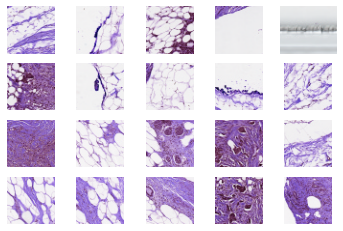

In [ ]:
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(pathframe.filepaths[vals]))
    plt.axis('off')
plt.show()

In [ ]:
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=0)
Train_new, valid = train_test_split(Train, train_size = 0.90, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(176, 2) (20, 2) (158, 2) (18, 2)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 40 , width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                  zoom_range=0.2, horizontal_flip = True, vertical_flip= True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(150,150), class_mode = 'binary', shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(150,150), class_mode = 'binary', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe = Test, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(150,150), class_mode = 'binary', shuffle=False)

Found 158 validated image filenames belonging to 2 classes.
Found 18 validated image filenames belonging to 2 classes.
Found 20 validated image filenames belonging to 2 classes.


{'No': 0, 'Yes': 1}
(16, 150, 150, 3)


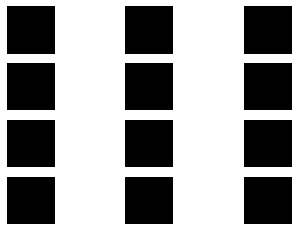

In [ ]:
print(train_gen.class_indices)
print(train_gen[0][0].shape)

for i in range(0, 12):
    val = train_gen[0][0][i]
    vals = val.astype('uint8')
    plt.subplot(4,3,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

In [ ]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape= (150,150,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


219070464/219055592 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               196736    
                                                                 
 batch_normalization_203 (Ba  (None, 128)              512       
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2, min_delta= 0.01)
model.compile(loss='binary_crossentropy', optimizer= Adam(lr=0.01), metrics=['accuracy'])
model.fit(train_gen, validation_data= valid_gen, epochs=25, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
10/10 [==============================] - 98s 7s/step - loss: 0.7320 - accuracy: 0.6519 - val_loss: nan - val_accuracy: 0.6111
Epoch 2/25
10/10 [==============================] - 67s 7s/step - loss: 0.4469 - accuracy: 0.8354 - val_loss: 788482080152946801097465916133736448.0000 - val_accuracy: 0.6111
Epoch 3/25
10/10 [==============================] - 67s 7s/step - loss: 0.2598 - accuracy: 0.9241 - val_loss: 86065091371367421062447890432.0000 - val_accuracy: 0.6111
Epoch 4/25
10/10 [==============================] - 67s 7s/step - loss: 0.2807 - accuracy: 0.9051 - val_loss: 2942655374223602614272.0000 - val_accuracy: 0.6111
Epoch 5/25
10/10 [==============================] - 67s 7s/step - loss: 0.2103 - accuracy: 0.9177 - val_loss: 32274437256511488.0000 - val_accuracy: 0.3889
Epoch 6/25
10/10 [==============================] - 67s 7s/step - loss: 0.3328 - accuracy: 0.8987 - val_loss: 116085139439616.0000 - val_accuracy: 0.3889
Epoch 7/25
10/10 [==============================]